# Importações de biblioteca e setando parâmetros iniciais

In [1]:
import pandas as pd
import sidrapy
import numpy as np
import matplotlib.pyplot as plt
import time

# Definindo parâmetro dimensão gráfico
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
# Importando dataframes usando sidrapy - Explicar o porquê de baixar 4 tabelas no artigo e os argumentos
start_time = time.time()

ipca_i2012_weight = sidrapy.get_table(table_code='1419', territorial_level="1", ibge_territorial_code="all", period='last 96', variable='66', classification='315/all')
ipca_i2012_var = sidrapy.get_table(table_code='1419', territorial_level="1", ibge_territorial_code="all", period='last 96', variable='63', classification='315/all')

ipca_i2020_weight = sidrapy.get_table(table_code='7060', territorial_level="1", ibge_territorial_code="all", period='last 18', variable='66', classification='315/all')
ipca_i2020_var = sidrapy.get_table(table_code='7060', territorial_level="1", ibge_territorial_code="all", period='last 18', variable='63', classification='315/all')

end_time = time.time()
print(f"Result calculated in {end_time - start_time} sec")

Result calculated in 25.239896535873413 sec


In [7]:
ipca_i2012_var

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,"Geral, grupo, subgrupo, item e subitem (Código)","Geral, grupo, subgrupo, item e subitem"
1,1,Brasil,2,%,0.56,1,Brasil,201201,janeiro 2012,63,IPCA - Variação mensal,7169,Índice geral
2,1,Brasil,2,%,0.86,1,Brasil,201201,janeiro 2012,63,IPCA - Variação mensal,7170,1.Alimentação e bebidas
3,1,Brasil,2,%,0.68,1,Brasil,201201,janeiro 2012,63,IPCA - Variação mensal,7171,11.Alimentação no domicílio
4,1,Brasil,2,%,5.44,1,Brasil,201201,janeiro 2012,63,IPCA - Variação mensal,7172,"1101.Cereais, leguminosas e oleaginosas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44540,1,Brasil,2,%,0.00,1,Brasil,201912,dezembro 2019,63,IPCA - Variação mensal,7792,9101008.Telefone celular
44541,1,Brasil,2,%,0.00,1,Brasil,201912,dezembro 2019,63,IPCA - Variação mensal,107688,9101018.Acesso à internet
44542,1,Brasil,2,%,0.26,1,Brasil,201912,dezembro 2019,63,IPCA - Variação mensal,7794,9101019.Aparelho telefônico
44543,1,Brasil,2,%,3.44,1,Brasil,201912,dezembro 2019,63,IPCA - Variação mensal,12429,9101021.Telefone com internet - pacote


In [ ]:
# Aux tables - Está sendo usado em algum lugar ou apenas para visualização?
conv_table = ipca_i2012_weight[['D4C', 'D4N']].iloc[1:].drop_duplicates().set_index('D4N')

#conv_table

# Funções

In [5]:
# PROPOSTA ALTERAÇÃO 
# Especificar no artigo que os caracteres diferentes estão sendo transformados em zero o que isso implica
# Plotar gráfico quantos elementos foram substituidos
# fazer uma função inner pra que a externa a chame e não ficar repetindo linha de código
# Dá pra colocar um argumento na função que evita fazer essa comparação, compensa?

def limpar_df(df) :
    """Função para tratar do dataframe que é importado do IBGE
    Isolando as colunas úteis"""
    
    # Armazenando o valor do código do dataframe
    variavel = ipca_i2012_var.iloc[1]['D3C']

    # Selecionando apenas as 3 colunas de interesse
    df_mod = df.loc[1:,['V','D2C', 'D4C']].replace('...', 0).astype(float)
    
    if variavel == 66 :
        df_mod.columns = ['peso','data','codigo']
        df_mod['data'] = pd.to_datetime(df_mod['data'], format='%Y%m').dt.date
        df_mod = pd.pivot_table(df_mod, values = 'peso',index = 'data', columns = 'codigo')
    
    else:
        df_mod.columns = ['var','data','codigo']
        df_mod['data'] = pd.to_datetime(df_mod['data'], format='%Y%m').dt.date
        df_mod = pd.pivot_table(df_mod, values = 'var',index = 'data', columns = 'codigo')
    

    return df_mod


In [8]:
limpar_df(ipca_i2012_var)

codigo,7169.0,7170.0,7171.0,7172.0,7173.0,7175.0,7176.0,7177.0,7184.0,7185.0,...,107677.0,107678.0,107679.0,107680.0,107681.0,107682.0,107683.0,107688.0,109463.0,109464.0
data,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.56,0.86,0.68,5.44,1.32,15.98,5.42,1.17,-0.09,-0.35,...,1.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.73,0.41
2012-02-01,0.45,0.19,-0.03,4.41,1.02,2.82,14.14,1.13,-1.20,-0.77,...,0.24,7.09,6.65,7.57,9.12,6.85,0.00,0.00,-0.49,0.14
2012-03-01,0.21,0.25,0.21,0.69,0.50,1.28,0.57,1.52,0.09,0.37,...,0.20,0.66,0.86,0.30,0.36,2.23,0.00,0.00,0.35,0.35
2012-04-01,0.64,0.51,0.62,4.57,0.44,13.09,1.03,4.65,1.35,4.07,...,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.18,0.17
2012-05-01,0.36,0.73,0.83,5.25,2.11,17.92,3.04,4.91,0.58,-1.17,...,-0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.90,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,0.11,-0.35,-0.84,-0.32,0.67,0.37,-0.94,-0.02,-0.14,1.37,...,1.07,0.32,1.39,0.52,0.95,-1.77,-1.57,0.00,0.08,-0.07
2019-09-01,-0.04,-0.43,-0.70,-0.63,0.63,-8.66,-1.90,-1.45,-0.50,0.84,...,-0.44,0.03,0.18,-0.20,-0.03,0.39,0.13,0.00,0.68,-0.14
2019-10-01,0.10,0.05,-0.03,-0.20,0.05,-4.30,-2.78,0.65,0.40,0.42,...,0.86,0.07,0.00,0.00,0.00,0.05,-2.23,0.00,-0.30,-0.41


In [9]:
# PROPOSTA ALTERAÇÃO versão 2 - usando for loop (Funcionando)

# Observação como o nome nos argumentos são diferentes do nome usado, então basicamente não servem pra nada,
# aparentemente quando se chama o "var" e o "peso" na fórmula está pegando direto da variável global, resolver isso
# excluir esses argumentos ou usar da forma certa
def calculo_nucleos(var1, peso1, tabela, aba ):
    """Função para calcular cada núcleo"""

    # Leitura da tabela "roubada" no excel, usado iloc para limpar sujeira
    tipo = pd.read_excel(tabela, sheet_name= aba).iloc[:,:4]
    
    #Declaração data frame final
    df_final = pd.DataFrame()    

    # For loop para percorrer todas as colunas e executar a fórmula do cálculo do núcleo
    for coluna in tipo.columns:
        df_final[coluna] = ((var1[tipo[coluna].dropna()]/100 )* peso1[tipo[coluna].dropna()]).sum(axis = 1)


    return df_final


In [12]:
# Função para extrair dados do Bacen (colocar docstring)
def consulta_bc(codigo_bcb):
    # Extração direto da api do bacen formato json
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_bcb}/dados?formato=json'
    df = pd.read_json(url)
    
    # Setando datetime
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    # Apenas dados a partir de 2012
    df = df[df['data'] > '2012']
    # Setando data como index do df
    df.set_index('data', inplace=True)
    
    
    # Visualização head do df
    #print(df.head())
    
    # Linhas de plotagem do gráfico da série
    #plt.plot(df)
    #plt.show()
    
    return df

# Uso integrado das funções

In [13]:
# PROSPOSTA ALTERAÇÃO - Obtendo databases modificadas
start_time = time.time()

ipca_i2012_var_pt = limpar_df(ipca_i2012_var)
ipca_i2020_var_pt = limpar_df(ipca_i2020_var)

ipca_i2012_weight_pt = limpar_df(ipca_i2012_weight)
ipca_i2020_weight_pt = limpar_df(ipca_i2020_weight)

# Juntando os dataframes de períodos diferentes
inter = set.intersection(set(ipca_i2012_var_pt.columns),set(ipca_i2020_var_pt.columns))
var = pd.concat([ipca_i2012_var_pt[inter], ipca_i2020_var_pt[inter]])
peso = pd.concat([ipca_i2012_weight_pt[inter], ipca_i2020_weight_pt[inter]])

# Executando função de cálculo
df_var = calculo_nucleos(var, peso, r'conv_table.xlsx', 'itens_por_nucleo')

end_time = time.time()
print(f"Result calculated in {end_time - start_time} sec")

df_var

Result calculated in 2.976153612136841 sec


,Serviços,Monitorados,Duráveis,Alimentos
data,,,,
2012-01-01,0.382891,0.114359,-0.021874,0.103038
2012-02-01,0.489669,0.067285,0.001282,-0.004552
2012-03-01,0.218063,0.054565,-0.040767,0.031712
2012-04-01,0.336732,0.090268,-0.033110,0.093608
2012-05-01,0.135928,0.075212,-0.019924,0.125293
...,...,...,...,...
2021-04-01,0.197853,0.101896,0.071069,0.070977
2021-05-01,0.054977,0.324320,0.099058,0.034783
2021-06-01,0.147020,0.128329,0.039322,0.049606


In [8]:
#Descrição das Tabelas Modificadas
df_var.head()
df_var.info()
df_var.shape
df_var.describe()
df_var.values
df_var.columns



<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 2012-01-01 to 2021-08-01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Serviços     114 non-null    float64
 1   Monitorados  114 non-null    float64
 2   Duráveis     114 non-null    float64
 3   Alimentos    114 non-null    float64
dtypes: float64(4)
memory usage: 4.5+ KB


Index(['Serviços', 'Monitorados', 'Duráveis', 'Alimentos'], dtype='object')

# Gráficos

Result calculated in 1.1155266761779785 sec


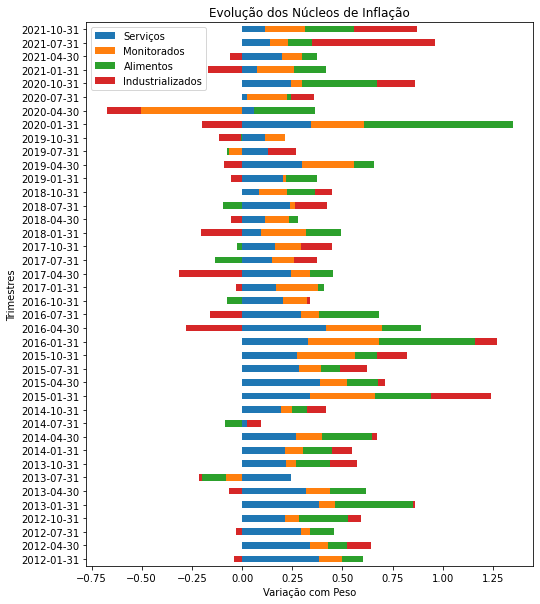

In [14]:
#Gráficos
start_time = time.time()

## Composição IPCA - por 4 núcleos
df_composicao = df_var.drop('Duráveis',axis=1)

# Calculando o núcleo de industrializados
varind = list(var[7169.0]) 

df2s = df_composicao.iloc[:, 0:4].sum(axis=1)

df_composicao['Número Índice'] = varind

cols = df_composicao.columns.tolist()

cols = cols[-1:] + cols[:-1]

df_composicao = df_composicao[cols]

df_composicao['Industrializados'] = df_composicao['Número Índice'] - df2s

# Adaptando o índice para melhorar a visualização da plotagem

dfplot_composicao = df_composicao.drop('Número Índice',axis=1)

dfplot_composicao.index = pd.to_datetime(dfplot_composicao.index)

dfplot_composicao = dfplot_composicao.resample('3M').last()

dfplot_composicao.index = dfplot_composicao.index.date

# Plotando o gráfico de stackedcolumns

dfplot_composicao.plot(kind='barh',stacked=True, figsize=(8,10))

plt.xlabel("Variação com Peso")
plt.ylabel("Trimestres")
plt.title("Evolução dos Núcleos de Inflação")

end_time = time.time()
print(f"Result calculated in {end_time - start_time} sec")

Result calculated in 0.1920011043548584 sec


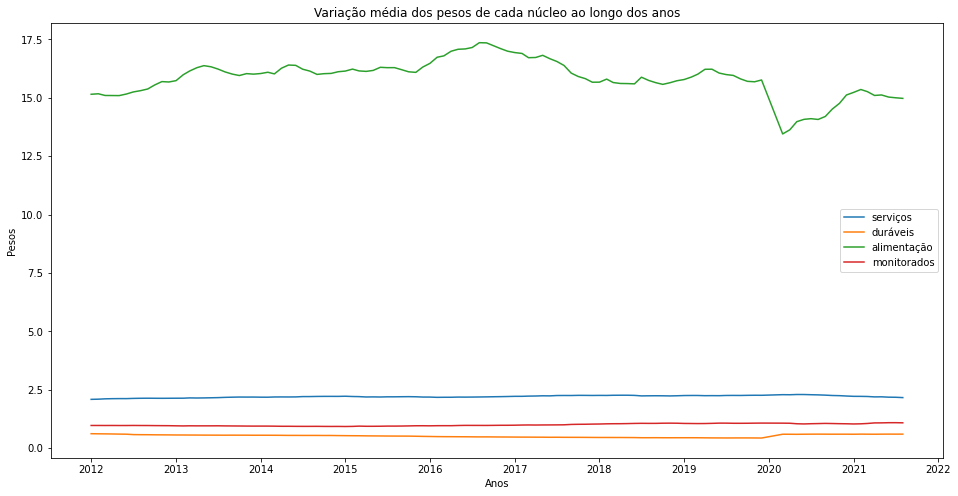

In [15]:
# Gráfico: variação peso ao longo do tempo - Dá para alterar usando o mesmo esquema da função de cálculo de núcleo
# Não é necessário colocar novamente essas listas, acho que dá pra pegar o .mean do dataframe inteiro, testar
start_time = time.time()

servicos = [7433.0, 7448.0, 7453.0, 107641.0, 7549.0, 7634.0, 7639.0, 7643.0, 7647.0, 7648.0, 7653.0, 107656.0, 7684.0, 7690.0, 7660.0, 7730.0, 12427.0, 107688.0, 107678.0, 7714.0]
duraveis = [7488.0, 7497.0, 12434.0, 7526.0, 7531.0, 7539.0, 7542.0, 7543.0, 7641.0, 107654.0, 7654.0, 7735.0, 7736.0, 7794.0, 7616.0]
monitorados = [7451.0, 7482.0, 7483.0, 7628.0, 7631.0, 7632.0, 7635.0, 7629.0, 7630.0, 7642.0, 107653.0, 7649.0, 7657.0, 7659.0, 107657.0, 7662.0, 7728.0, 107668.0, 7789.0, 7696.0]
alimentacao = [7171.0]

peso_servicos = peso[servicos].mean(axis=1)
peso_duraveis = peso[duraveis].mean(axis=1)
peso_alimentacao = peso[alimentacao].mean(axis=1)
peso_monitorados = peso[monitorados].mean(axis=1)

plt.plot(peso_servicos, label="serviços")
plt.plot(peso_duraveis, label="duráveis")
plt.plot(peso_alimentacao, label="alimentação")
plt.plot(peso_monitorados, label="monitorados")
plt.legend(loc="right")
plt.xlabel("Anos")
plt.ylabel("Pesos")
plt.title("Variação média dos pesos de cada núcleo ao longo dos anos")

end_time = time.time()
print(f"Result calculated in {end_time - start_time} sec")

Result calculated in 0.27728796005249023 sec


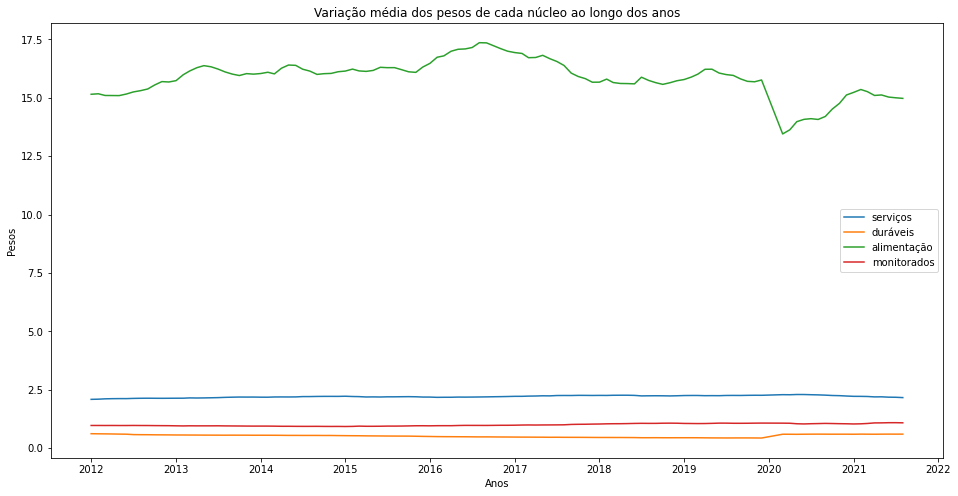

In [16]:
# POSSÍVEL MUDANÇA - mas fica mais lento, apesar de ser irrelevante nesse caso
start_time = time.time()

tipo = pd.read_excel(r'conv_table.xlsx', sheet_name= 'itens_por_nucleo').iloc[:,:4]

peso_servicos = peso[tipo['Serviços'].dropna()].mean(axis=1)
peso_duraveis = peso[tipo['Duráveis'].dropna()].mean(axis=1)
peso_alimentacao = peso[tipo['Alimentos'].dropna()].mean(axis=1)
peso_monitorados = peso[tipo['Monitorados'].dropna()].mean(axis=1)

plt.plot(peso_servicos, label="serviços")
plt.plot(peso_duraveis, label="duráveis")
plt.plot(peso_alimentacao, label="alimentação")
plt.plot(peso_monitorados, label="monitorados")
plt.legend(loc="right")
plt.xlabel("Anos")
plt.ylabel("Pesos")
plt.title("Variação média dos pesos de cada núcleo ao longo dos anos")

end_time = time.time()
print(f"Result calculated in {end_time - start_time} sec")

Result calculated in 0.6785354614257812 sec


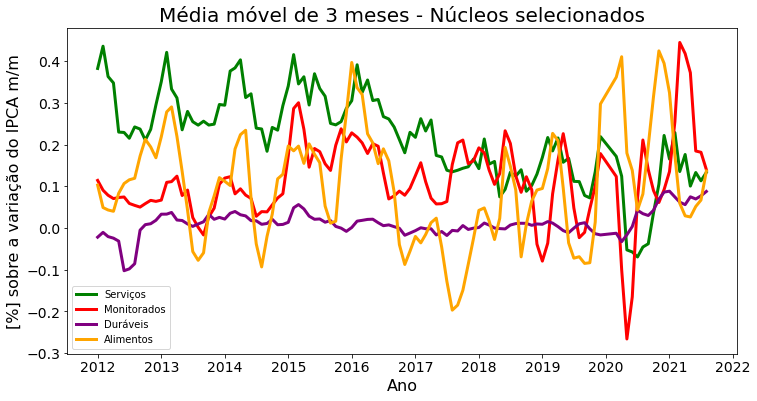

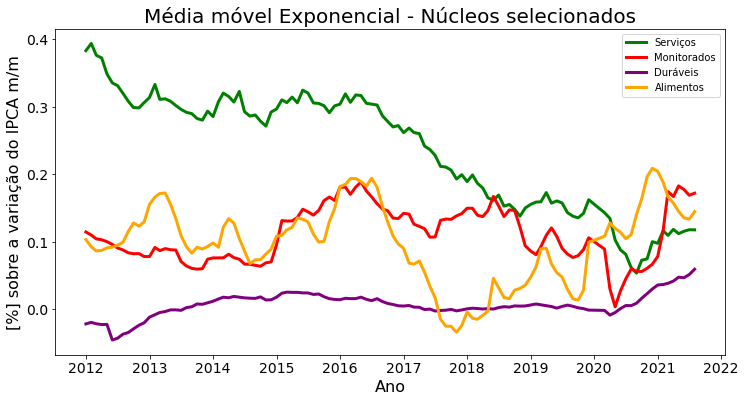

In [17]:
#Gráficos de: Médias Móveis - Perguntar sobre essa suavização

#https://towardsdatascience.com/moving-averages-in-python-16170e20f6c
start_time = time.time()

## Suavizando tendência - 3 meses
df_var_3mma = df_var.rolling(3, min_periods=1).mean()
df_var_exp = df_var.ewm(alpha = 0.1, adjust=False).mean()

colors = ['green', 'red', 'purple', 'orange']
df_var_3mma.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Média móvel de 3 meses - Núcleos selecionados', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('[%] sobre a variação do IPCA m/m', fontsize=16)

## Suavizando tendência - Média Móvel exponencial
colors = ['green', 'red', 'purple', 'orange']
df_var_exp.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Média móvel Exponencial - Núcleos selecionados', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('[%] sobre a variação do IPCA m/m', fontsize=16)

## Acumulando variação 12m
df_roll12m = df_var.rolling(window=12).apply(np.prod) - 1

end_time = time.time()
print(f"Result calculated in {end_time - start_time} sec")

In [ ]:
#verificar com Dev
#conv_table = pd.read_excel(r'D:\Users\Thais\Documents\Python Scripts\Projeto Básico\src\conv_table.xlsx', sheet_name='itens_por_nucleo')
df_final = pd.DataFrame()
df_nucleo = (var[servicos]/100 )* peso[servicos]
df_nucleo_sum = df_nucleo.sum(axis = 1)
df_final = df_final.append(df_nucleo_sum, ignore_index=True)
#Perguntar sobre datas com zeros 
#Perguntar sobre group_by
#Perguntar sobre o tamanho do scripts - códigos eficientes
#Blogs medium


<AxesSubplot:xlabel='data'>

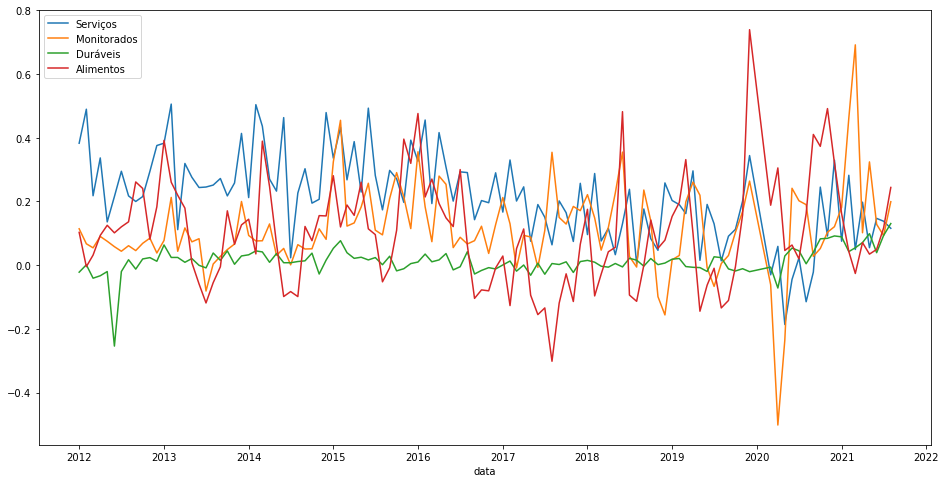

In [22]:
df_var.plot()

# Calcular volatilidade também


In [17]:
print(df_var.mean(axis = 0))


Serviços       0.215263
Monitorados    0.115293
Duráveis       0.013117
Alimentos      0.100424
dtype: float64


In [16]:
print(df_var.mean(axis = 1))


data
2012-01-01    0.144603
2012-02-01    0.138421
2012-03-01    0.065893
2012-04-01    0.121874
2012-05-01    0.079127
                ...   
2021-04-01    0.110448
2021-05-01    0.128284
2021-06-01    0.091069
2021-07-01    0.110320
2021-08-01    0.172524
Length: 114, dtype: float64


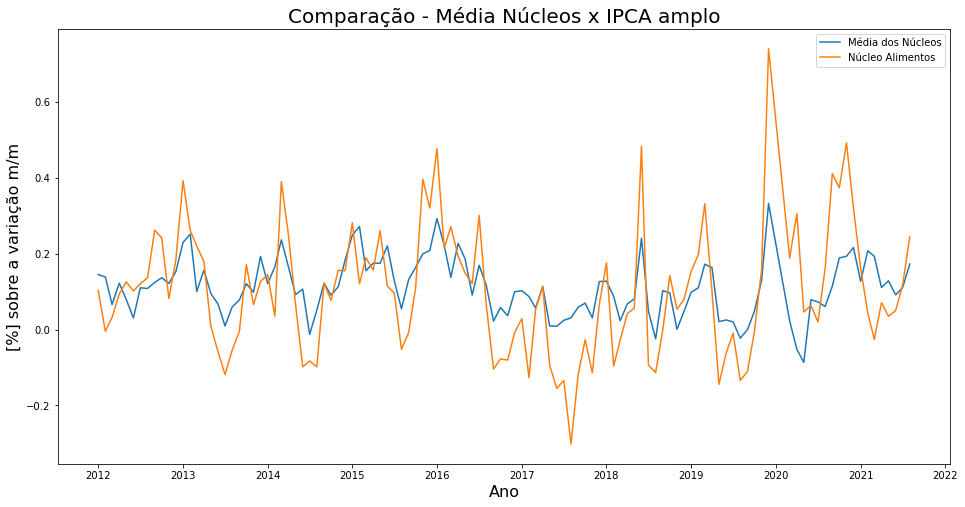

In [44]:
# Índice nacional de preços ao consumidor-amplo (Variação Mensal)
ipca = consulta_bc(433)

#plt.style.use('Solarize_Light2')
plt.title('Comparação - Média Núcleos x IPCA amplo', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('[%] sobre a variação m/m', fontsize=16)
plt.plot(df_var.mean(axis = 1), label="Média dos Núcleos")
#plt.plot(ipca, label="IPCA")
plt.plot(df_var['Alimentos'], label="Núcleo Alimentos")
plt.legend(loc='best')
plt.show()


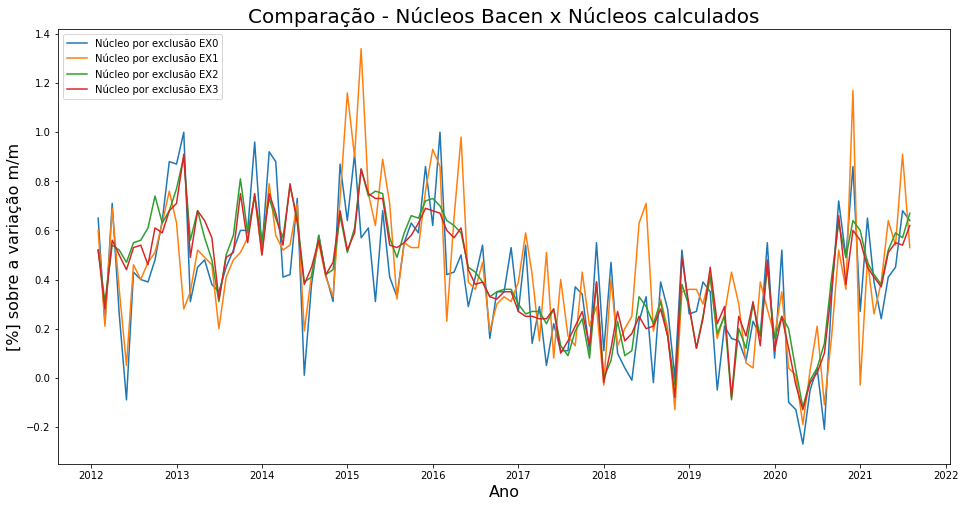

In [23]:
# Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX0 

nucleo_ex0 = consulta_bc(11427)

# Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX1 

nucleo_ex1 = consulta_bc(16121)

# Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX2

nucleo_ex2 = consulta_bc(27838)

# Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX3

nucleo_ex3 = consulta_bc(27839)

#plt.plot(df_var)
#plt.plot(df_var.mean(axis=1), label="Média dos Núcleos")
plt.title('Comparação - Núcleos Bacen x Núcleos calculados', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('[%] sobre a variação m/m', fontsize=16)
plt.plot(nucleo_ex0, label="Núcleo por exclusão EX0")
plt.plot(nucleo_ex1, label="Núcleo por exclusão EX1")
plt.plot(nucleo_ex2, label="Núcleo por exclusão EX2")
plt.plot(nucleo_ex3, label="Núcleo por exclusão EX3")
plt.legend(loc='best')
plt.show()


In [40]:
df_var['ipca'] = nucleo_ex3['valor']
df_var.corr()


,Serviços,Monitorados,Duráveis,Alimentos,ipca
Serviços,1.000000,0.161551,0.030219,0.213059,0.702611
Monitorados,0.161551,1.000000,0.244755,0.098501,0.219468
Duráveis,0.030219,0.244755,1.000000,0.166525,0.251691
Alimentos,0.213059,0.098501,0.166525,1.000000,0.356475
ipca,0.702611,0.219468,0.251691,0.356475,1.000000


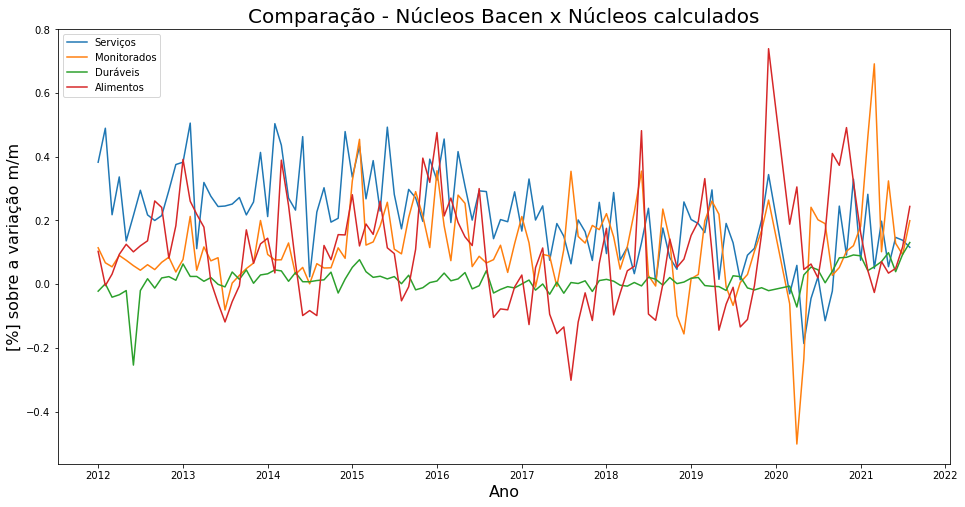

In [24]:
plt.title('Comparação - Núcleos Bacen x Núcleos calculados', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('[%] sobre a variação m/m', fontsize=16)
plt.plot(df_var['Serviços'], label="Serviços")
plt.plot(df_var['Monitorados'], label="Monitorados")
plt.plot(df_var['Duráveis'], label="Duráveis")
plt.plot(df_var['Alimentos'], label="Alimentos")
plt.legend(loc='best')
plt.show()


In [27]:
all = pd.concat([nucleo_ex0, nucleo_ex1, nucleo_ex2, nucleo_ex3])
all

,valor
data,
2012-02-01,0.65
2012-03-01,0.22
2012-04-01,0.71
2012-05-01,0.26
2012-06-01,-0.09
...,...
2021-04-01,0.37
2021-05-01,0.51
2021-06-01,0.55


<AxesSubplot:xlabel='data'>

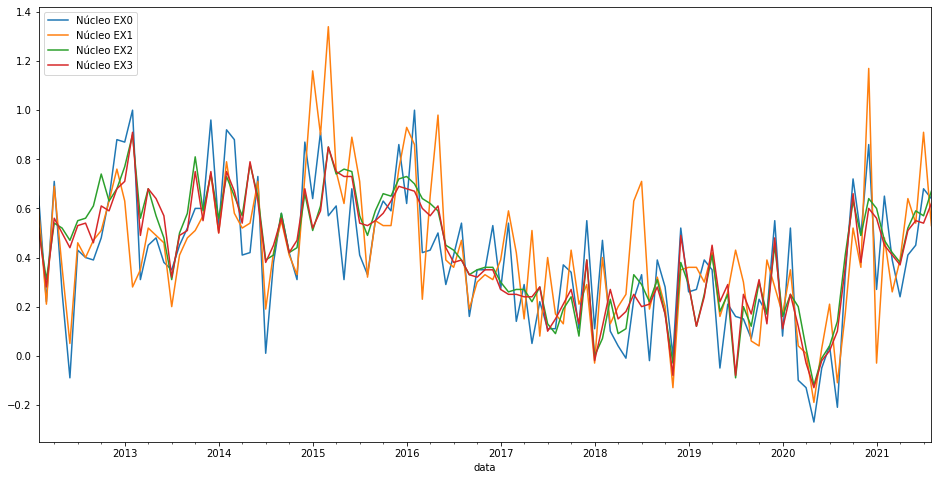

In [41]:
all = pd.merge(nucleo_ex0, nucleo_ex1, how='outer', left_index=True, right_index=True)
all = pd.merge(all, nucleo_ex2, how='outer', left_index=True, right_index=True)
all = pd.merge(all, nucleo_ex3, how='outer', left_index=True, right_index=True)
all.columns = ['Núcleo EX0','Núcleo EX1','Núcleo EX2', 'Núcleo EX3']


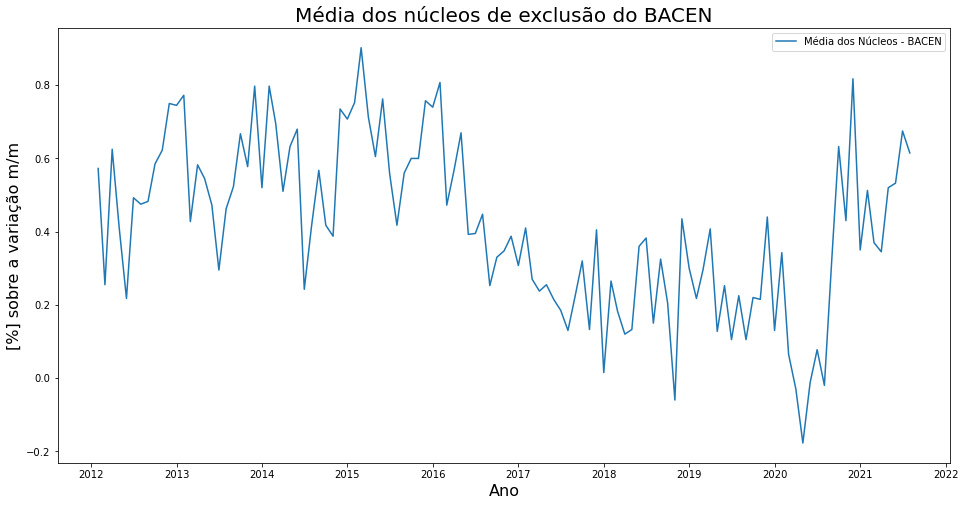

In [51]:
plt.title('Média dos núcleos de exclusão do BACEN', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('[%] sobre a variação m/m', fontsize=16)
#plt.plot(df_var.mean(axis = 1), label="Média dos Núcleos - Cálculo Próprio")
plt.plot(all.mean(axis = 1), label="Média dos Núcleos - BACEN")
plt.legend(loc='best')
plt.show()

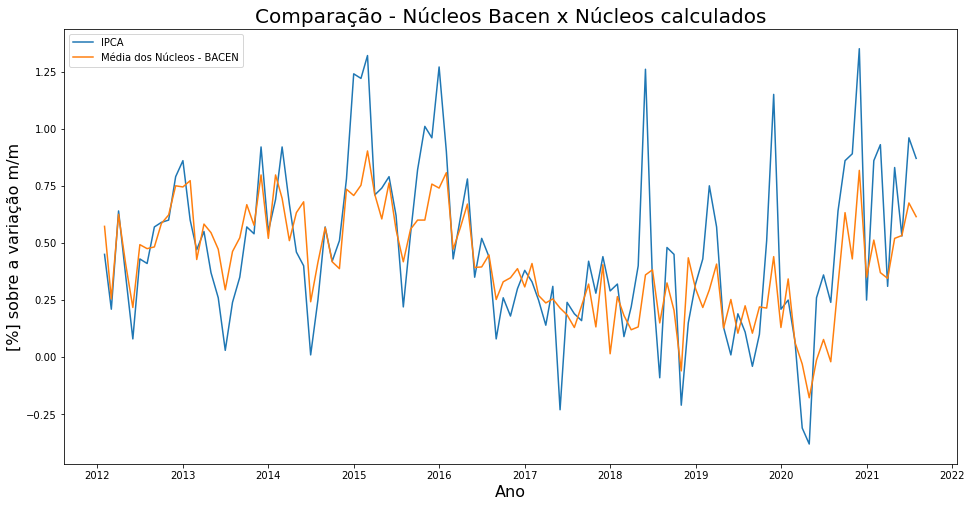

In [45]:
plt.title('Comparação - Núcleos Bacen x Núcleos calculados', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('[%] sobre a variação m/m', fontsize=16)
plt.plot(ipca, label="IPCA")
plt.plot(all.mean(axis = 1), label="Média dos Núcleos - BACEN")
plt.legend(loc='best')
plt.show()

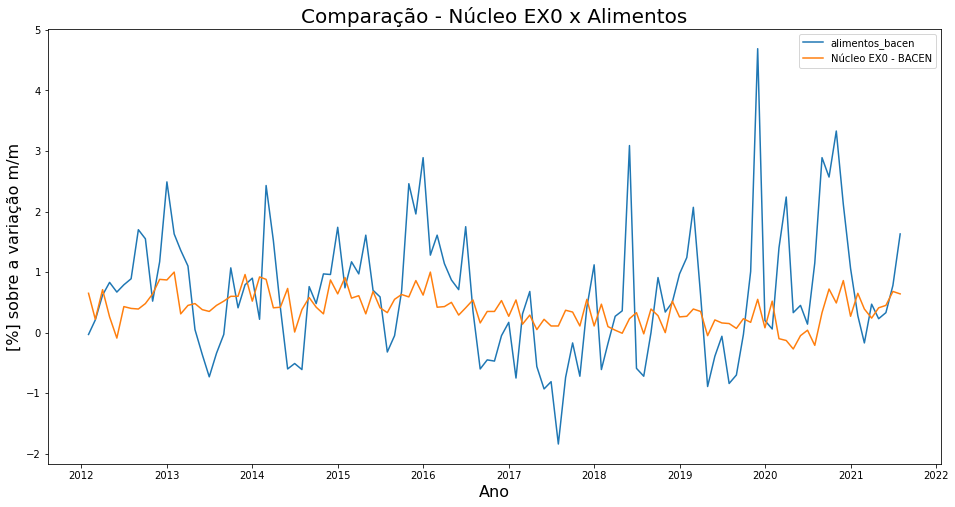

In [49]:
# Índice nacional de preços ao consumidor - Amplo (IPCA) - Núcleo por exclusão - EX3

alimentos_bacen = consulta_bc(27864 )


plt.title('Comparação - Núcleo EX0 x Alimentos', fontsize=20)
plt.xlabel('Ano', fontsize=16)
plt.ylabel('[%] sobre a variação m/m', fontsize=16)
plt.plot(alimentos_bacen, label="alimentos_bacen")
plt.plot(nucleo_ex0, label="Núcleo EX0 - BACEN")
plt.legend(loc='best')
plt.show()